C:\Users\DELL\AppData\Local\Temp\ipykernel_1552\3264734826.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


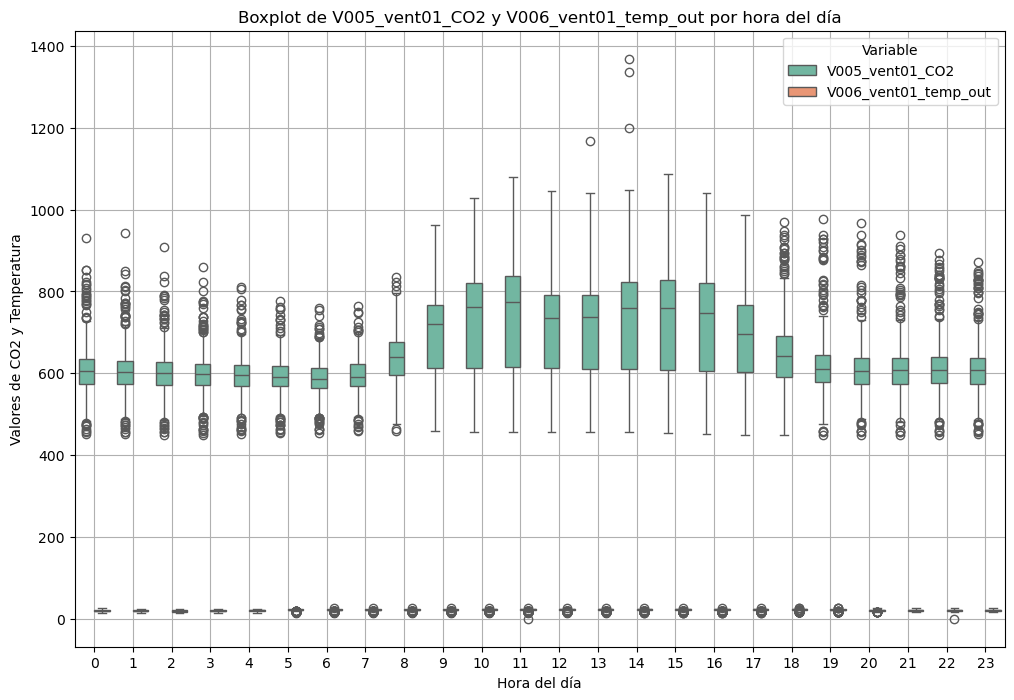

Resumen de los promedios por cluster para ['V005_vent01_CO2', 'V006_vent01_temp_out']:
         V005_vent01_CO2  V006_vent01_temp_out
cluster                                       
0             597.368735             22.116812
1             612.511465             18.013361
2             795.925984             23.049326


C:\Users\DELL\AppData\Local\Temp\ipykernel_1552\3264734826.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


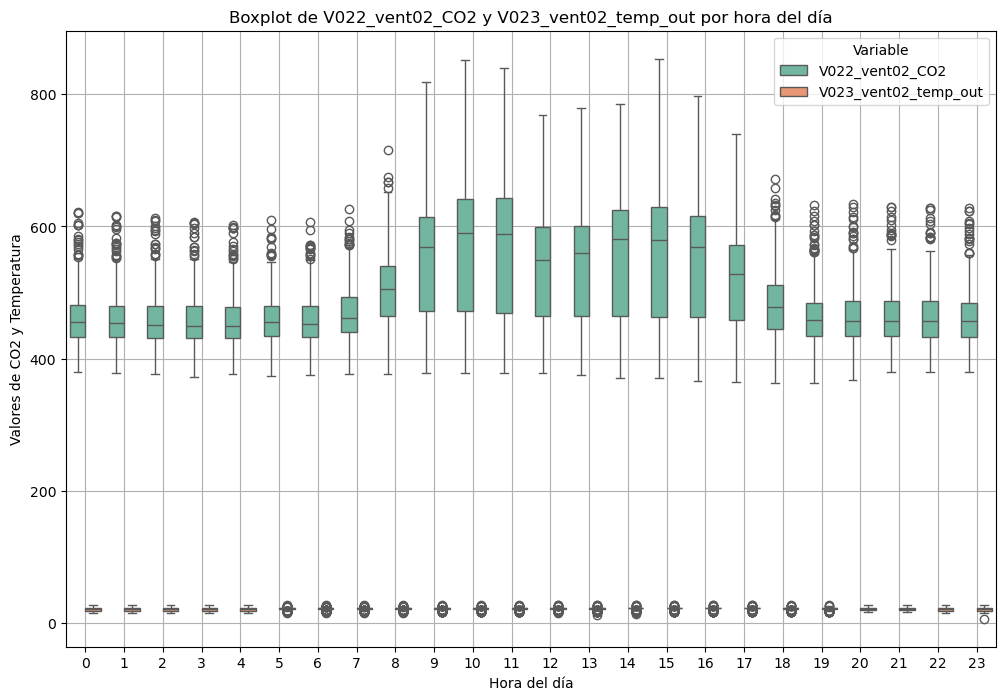

Resumen de los promedios por cluster para ['V022_vent02_CO2', 'V023_vent02_temp_out']:
         V022_vent02_CO2  V023_vent02_temp_out
cluster                                       
0             453.676350             22.611613
1             470.098409             18.813974
2             604.385095             23.048961


In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset correctamente con el delimitador ";"
df = pd.read_csv('data(1).csv', delimiter=';')

# Convertir la columna de timestamp a formato de fecha y extraer la hora del día
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d.%m.%Y %H:%M', errors='coerce')  # Manejar fechas no válidas
df['hour'] = df['timestamp'].dt.hour  # Extraer la hora (0 a 23)

# Seleccionar las columnas de interés para los pares de variables
pair_1 = ['V005_vent01_CO2', 'V006_vent01_temp_out']
pair_2 = ['V022_vent02_CO2', 'V023_vent02_temp_out']

# Eliminar filas con valores faltantes (NaN) en los pares de variables
df_clean = df.dropna(subset=pair_1 + pair_2)

# Crear una función para aplicar K-means y visualizar resultados con Boxplots combinados
def apply_kmeans_and_boxplot_by_hour(df, variables, n_clusters):
    # 2. Estandarizar los pares de variables
    scaler = StandardScaler()
    X = df[variables]
    X_scaled = scaler.fit_transform(X)
    
    # 3. Aplicar K-means a los pares de variables
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)
    
    # 4. Preparación para Boxplot combinado: reorganizar el DataFrame para combinar CO2 y temperatura en un gráfico
    df_long = pd.melt(df, id_vars=['hour', 'cluster'], value_vars=variables, 
                      var_name='Variable', value_name='Valor')
    
    # 5. Visualización con Boxplot combinado para ambas variables por hora del día
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='hour', y='Valor', hue='Variable', data=df_long, palette='Set2')
    plt.title(f"Boxplot de {variables[0]} y {variables[1]} por hora del día")
    plt.xlabel("Hora del día")
    plt.ylabel("Valores de CO2 y Temperatura")
    plt.xticks(range(0, 24))  # Mostrar todas las horas de 0 a 23
    plt.grid(True)
    plt.show()

    # 6. Resumen de los promedios por cluster
    print(f"Resumen de los promedios por cluster para {variables}:")
    print(df.groupby('cluster')[variables].mean())

# Definir la cantidad de clusters
n_clusters = 3

# Aplicar K-means para el primer par de variables: V005_vent01_CO2 y V006_vent01_temp_out
apply_kmeans_and_boxplot_by_hour(df_clean, pair_1, n_clusters)

# Aplicar K-means para el segundo par de variables: V022_vent02_CO2 y V023_vent02_temp_out
apply_kmeans_and_boxplot_by_hour(df_clean, pair_2, n_clusters)
